# Group Meeting 8
Partial Information Decomposition I - the problem of multivariate mutual information between sources and targets, basic redundancy lattices.

### Readings

Williams & Beer, Nonegative Decomposition of Multivariate Mutual Informaton https://arxiv.org/abs/1004.2515

### The Problem that PID tries to Solve:

Consider a situation where you have two elements of a system ($X_1$, $X_2$) that both interact with some third element $Y$ (for simplicty, we'll assume this is a directed relationship $X_1 \rightarrow Y$, $X_2 \rightarrow Y$). This kind of structure appears in almost all complex systems (neurons synapsing onto each-other, firms in an economy who sell products or services to each-other, social networks, etc), and a natural question to ask is: *"how do $X_1$ and $X_2$ predict the behavior of $Y$?*. 

The easiest (and typically default answer) is to do something like a functional connectivity analysis of the form: $MI(X_1 ; Y)$ and $MI(X_2 ; Y)$ - this tacitly assumes that all parent elements are independent and passing different information to the child. You could also look at the mutual information between the joint states of $X_1$, $X_2$, and $Y$ ($MI(X_1X_2 ; Y)$), however, as we have seen when looking at the synergistic $XOR$ function, the relationship betweent the pairwise mutual informations and the joint mutual informatons is not always totally obvious. 

#### Redundant Information

Consider the following 3 cases. We will start with the case where $X_1$ and $X_2$ are *always the same.*

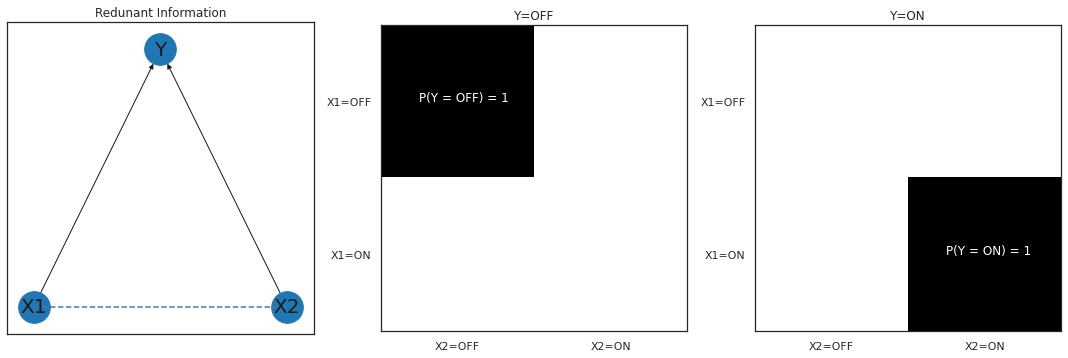

In [105]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set(style="white")

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
G = nx.DiGraph([("X1","Y"), ("X2", "Y")])
pos = nx.spectral_layout(G)
nx.draw_networkx(G, pos=pos, node_size=10**3, with_labels=True, font_size=20)
plt.hlines(pos["X1"][1], pos["X1"][0], pos["X2"][0], linestyle="--")
plt.title("Redunant Information")

plt.subplot(1,3,2)
M = np.zeros((2,2))
M[0,0] = 1
plt.imshow(M, cmap="gray_r")
plt.xticks([0, 1], ["X2=OFF","X2=ON"])
plt.yticks([0, 1], ["X1=OFF", "X1=ON"])
plt.title("Y=OFF")
plt.text(-0.25, 0, "P(Y = OFF) = 1", c="white")

plt.subplot(1,3,3)
M = np.zeros((2,2))
M[1,1] = 1
plt.imshow(M, cmap="gray_r")
plt.xticks([0, 1], ["X2=OFF","X2=ON"])
plt.yticks([0, 1], ["X1=OFF", "X1=ON"])
plt.title("Y=ON")
plt.text(0.75, 1, "P(Y = ON) = 1", c="white")


plt.tight_layout()

On the left, you have the actual model that generates out data. $Y$ is a function of $X_1$ and $X_2$, but crucially, both $X$'s are always the same. Furthermore, $Y$ always copies the state of the both variables. 

In the middle and right plots, you can see the joint probability distributions describing $X_1,X_2,Y$. Note that, since $X_1 = X_2$, you *knowing the state of either variable lets you perfectly predict Y.* That is to say, information about $Y$ is *redundantly shared* by $X_1$ and $X_2$. You could remove either of the parent nodes and your predictive power about $Y$ would be unchanged. 

In this case: $MI(X_1 ; Y) = MI(X_2 ; Y) = MI(X_1X_2 ; Y) = 1$.

#### Unique Information

Now consider the case where $Y$ is a $COPY$ gate that is only interested in $X_2$.

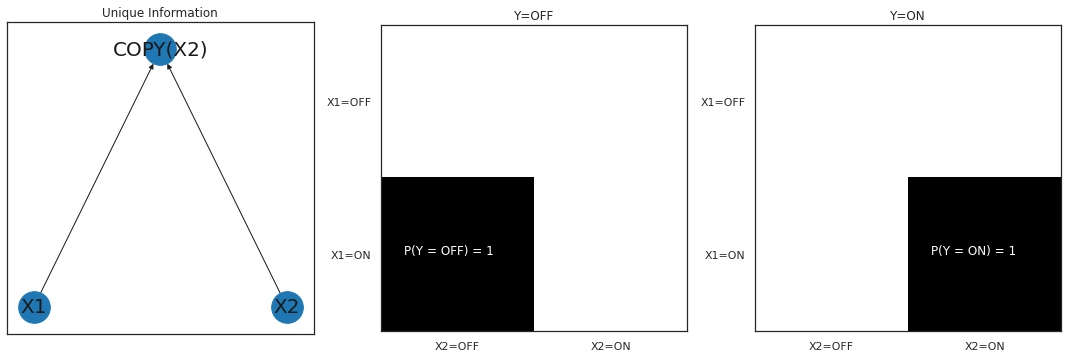

In [112]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
G = nx.DiGraph([("X1","COPY(X2)"), ("X2", "COPY(X2)")])
pos = nx.spectral_layout(G)
nx.draw_networkx(G, pos=pos, node_size=10**3, with_labels=True, font_size=20)
plt.title("Unique Information")

plt.subplot(1,3,2)
M = np.zeros((2,2))
M[1,0] = 1
plt.imshow(M, cmap="gray_r", vmin=0, vmax=1)
plt.xticks([0, 1], ["X2=OFF","X2=ON"])
plt.yticks([0, 1], ["X1=OFF", "X1=ON"])
plt.title("Y=OFF")
plt.text(-0.35, 1, "P(Y = OFF) = 1", c="white")

plt.subplot(1,3,3)
M = np.zeros((2,2))
M[1,1] = 1
plt.imshow(M, cmap="gray_r", vmin=0, vmax=1)
plt.xticks([0, 1], ["X2=OFF","X2=ON"])
plt.yticks([0, 1], ["X1=OFF", "X1=ON"])
plt.title("Y=ON")
plt.text(0.65, 1, "P(Y = ON) = 1", c="white")

plt.tight_layout()

Here, we $X_2$ totally predicts the behavior of $Y$, $X_1$ provides no meaningful information at all. It doesn't matter what the value of $X_1$ is: there are cases where $X_1 = ON \rightarrow Y=OFF$ and where $X_1 = ON \rightarrow Y=ON$. In contrast, if $X_2 = OFF$, then $Y = OFF$ and if $X_2 = ON$ then $Y = ON$. 

We would say here that information about $Y$ is *uniquely present in $X_2$*. We can say that $MI(X_1 ; Y) = 0$ and that $MI(X_2 ; Y) = MI(X_1X_2 ; Y) = 1$.

#### Synergistic Information

Finally, we can look at the last case: where all the information is stored in the joint states and not accessible to either $X$ individually. Consider the case where $Y=XOR(X_1, X_2)$:

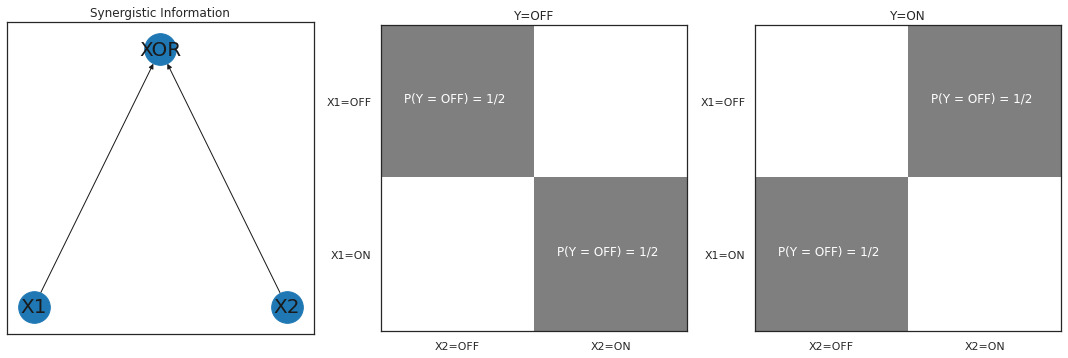

In [134]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
G = nx.DiGraph([("X1","XOR"), ("X2", "XOR")])
pos = nx.spectral_layout(G)
nx.draw_networkx(G, pos=pos, node_size=10**3, with_labels=True, font_size=20)
plt.title("Synergistic Information")

plt.subplot(1,3,2)
M = np.zeros((2,2))
M[0,0] = 1/2
M[1,1] = 1/2
plt.imshow(M, cmap="gray_r", vmin=0, vmax=1)
plt.xticks([0, 1], ["X2=OFF","X2=ON"])
plt.yticks([0, 1], ["X1=OFF", "X1=ON"])
plt.title("Y=OFF")
plt.text(-0.35, 0, "P(Y = OFF) = 1/2", c="white")
plt.text(0.65, 1, "P(Y = OFF) = 1/2", c="white")

plt.subplot(1,3,3)
M = np.zeros((2,2))
M[0,1] = 1/2
M[1,0] = 1/2
plt.imshow(M, cmap="gray_r", vmin=0, vmax=1)
plt.xticks([0, 1], ["X2=ON","X2=ON"])
plt.yticks([0, 1], ["X1=ON", "X1=ON"])
plt.title("Y=ON")
plt.text(-0.35, 1, "P(Y = OFF) = 1/2", c="white")
plt.text(0.65, 0, "P(Y = OFF) = 1/2", c="white")

plt.tight_layout()

What we are seeing here is the case where knowing the state of any individual parent node gives you no information about the state of $Y$. There are cases where $X_1 = OFF, Y=ON$ and where $X_1 = ON, Y=ON$, and the same is true for $X_2$. The only way to accurately predict the state of $Y$ is to know both the states of $X_1$ and $X_2$ simultaniously. There is no information unque to either $X_1$ or $X_2$ and certainly no information redundantly shared between them. 

Here: $MI(X_1 ; Y) = MI(X_2 ; Y) = 0$ and $MI(X_1X_2 ; Y) = 1$.

### Information Decomposition

It shouldn't be too hard to convince yourself that these are the only ways that the mutual information from some set of sources to a single target can be broken down. To fully understand how information is distributed over the, we would like to find a way to break down the joint mutual information between $X_1, X_2$ and $Y$ like this:

\begin{equation}
MI(X_1X_2 ; Y) = Red(X_1,X_2 ; Y) + Unq(X_1;Y) + Unq(X_2;Y) + Syn(X_1,X_2;Y)
\end{equation}

Here $Red()$ referenst to the information *redundantly* present in the parent elements, $Unq()$ is the information about $Y$ uniquely present in any individual element, and $Syn()$ is the synergistic information that is only accessible when $X_1$ and $X_2$ are considered jointly.

In case 1 (the pure-redundancy case): $MI(X_1X_2 ; Y) = 1 + 0 + 0 + 0$. In case 2 (the unique case): $MI(X_1X_2 ; Y) = 0 + 0 + 1 + 0$, and in case 3 (the synergistic $XOR$ case), $MI(X_1X_2 ; Y) = 0 + 0 + 0 + 1$.

Furthermore, we can break down the mutual information between the individual variables and $Y$ in the same way:

\begin{equation}
MI(X_1 ; Y) = Red(X_1, X_2 ; Y) + Unq(X_1;Y)
\end{equation}

\begin{equation}
MI(X_2 ; Y) = Red(X_1, X_2 ; Y) + Unq(X_2;Y)
\end{equation}

Note that, in this case, even though we are only interested in the mutual information between single parents and the target, to determine which information is *unique* to a given parent, we *still need to account for the other parents influencing the target.*

The full information decomposition for a set of two parents and a single target is:

\begin{eqnarray}
MI(X_1X_2 ; Y) &=& Red(X_1,X_2 ; Y) + Unq(X_1;Y) + Unq(X_2;Y) + Syn(X_1,X_2;Y) \\
MI(X_1 ; Y) &=& Red(X_1, X_2 ; Y) + Unq(X_1;Y) \\
MI(X_2 ; Y) &=& Red(X_1, X_2 ; Y) + Unq(X_2;Y)
\end{eqnarray}

Notice that we have 3 equations and 4 unknowns: the three mutual information terms can be calculated, but $Red()$, $Syn()$, and both $Unq()$ functions are unknown. Consequently we have an *underdetermined system of equations*. No amount of clever algebraic substitution will allow us to get the full decomposition solely from mutual information calculations. 

If we are able to figure out any of these functions ($Syn()$, $Red()$, or $Unq()$), then we can solve for the rest. Unfortunately, this turns out to be tricky. 

### Redundancy Lattices

An obvious place to start is to look at how the information distributed over the system is "nested": i.e. what information can be understood as a subset of some larger set of information. It should be obvious that the redundant information shared between both parents is also present in the mutual information between either parent and the target:

\begin{equation}
Red(X_1, X_2, Y) \subset MI(X_1 ; Y), MI(X_2 ; Y)
\end{equation}

Where $\subset$ is read as "is a subset of."

Furthermore, the mutual information of any individual parents and the target (which, remember, contains the redundant information) is itself a subset of the joint mutual information:

\begin{equation}
MI(X_1 ; Y), MI(X_2 ; Y) \subset MI(X_1X_2 ; Y)
\end{equation}

We can represent these relationships in a Venn Diagram:

In [136]:
from IPython.display import Image 
Image(url="https://ars.els-cdn.com/content/image/1-s2.0-S027826261530021X-gr2_lrg.jpg", width=500)

Note that here $I_{shd}()$ is equivalanet to $Red()$ and that the notation $I_{unq}(Y;X_1 \backslash X_2)$ is equivalent to $Unq(X_1, Y)$ and read as "the unqiue information present in $X_1$ and NOT in $X_2$."

Another way to represent this kind of structure is with a *lattice.* A lattice is an algebraic structure where elements have a "partial ordering", which is to say that for *some* elements you can say that "element 1 is greater than element 2." Note that this is not true for all elements (it is only partially ordered). 

There is a little mathematics here that I am skipping over (please see the original paper by Williams and Beer for the full derivation of the lattice), but in general we can say that *if we knew how to extract the redundant information between a set of sources*, then we can define every term as the difference between the mutual information between those two variables and the redundancy. 

For example:

\begin{equation}
Unq(X_1 ; Y) = MI(X_1 ; Y) - Red(X_1,X_2 ; Y)
\end{equation}

\begin{equation}
Unq(X_2 ; Y) = MI(X_2 ; Y) - Red(X_1,X_2 ; Y)
\end{equation}

And the synergy:

\begin{equation}
Syn(X_1, X_2 ; Y) = MI(X_1X_2 ; Y) - Unq(X_1 ; Y) - Unq(X_2 ; Y) - Red(X_1, X_2 ; Y)
\end{equation}

This allows us to extract the partial ordering and represent it as a lattice. To simplify things a little bit, we will introduce some new notation: instead of writing $X$ with subscripts, we will only use the subscript (for ex. $X_1 = \{1\}$ and  $X_2 = \{2\}$. The redundant information shared between $X_1$ and $X_2$ will be represented as: $\{1\}\{2\}$ and the synergistic information will be notated by $\{12\}$. Note that this is not "twelve".

Based on the equations above, we can construct the following partial ordering relationship:

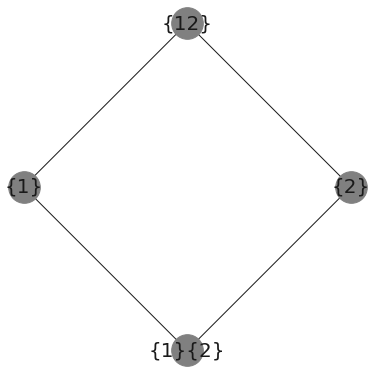

In [153]:
settings = {
    "{1}{2}" : np.array([0,0]),
    "{1}" : np.array([-1, 1]),
    "{2}" : np.array([1, 1]),
    "{12}" : np.array([0, 2])
           }

plt.figure(figsize=(5,5))
H = nx.Graph([("{1}{2}","{1}"),
              ("{1}{2}","{2}"),
              ("{1}","{12}"),
              ("{2}","{12}")
             ])

nx.draw(H, pos=settings, node_size=10**3, with_labels=True, font_size=20, node_color="grey")

So, if you want to know the value of any particular partial information term, it could be calculated recursively as the difference between the information present in that particular combination of elements and the sum of all the combinations below it on the the lattice. 

**NOTE: This is NOT a mathematically rigorous derivation of the redundancy lattice. If you want to use this in practice, you MUST read the original Williams + Beer paper, as well as more recent developments. This is purely to build intuition and there are a lot of moving parts I have skipped over for clarity's sake.**

In general, we refer to this kind of lattice as *redundancy lattice* and, for a given set of sources synapsing onto a single target variable, it gives us all the meaningful ways information about the target can be distributed over the source variables. As is the case in many combinatorial spaces, the number of unique partial information terms (vertices in the lattice like $\{12\}, \{1\}, \{2\}$, and $\{1\}\{2\}$) grows unbelievably fast. For an $n$ element system, the number of unique PI terms grows with the Dedekind numbers, a mind-bogglingly rapidly growing integer sequence (if you have five elements synapsing onto a single parent, you have ~8,000 possible PI terms in your lattice. No one knows how many terms are relevant in a 9-parents system, as the Dedekind numbers have only ever been calculated up to $D(8)$.

A 3-parent redundancy lattice can be seen here on the right:
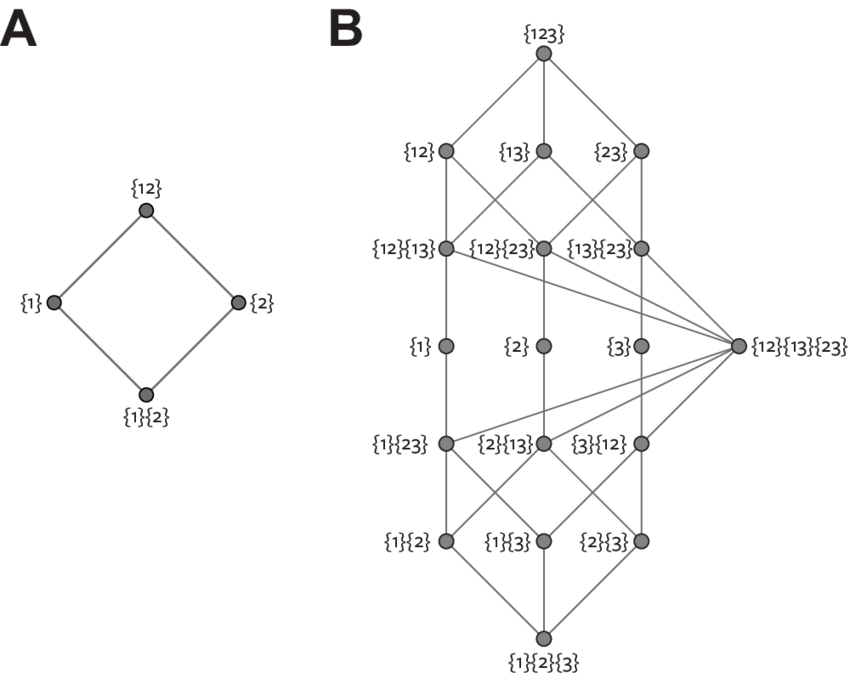

This presents one of the *major* difficulties of working with partial information decomposition in anything other than a theoretical context: only the smallest, most trivial systems can actually characterized in this manner. I've used this in some of my research and it is almost impossible to get above 5 or 6 parents synapsing onto a single target because the calculations become computationally intractable. There's also some question about how to interpret the results. For example, you might get a PI term like: $\{1\}\{2\}\{345\}$ and it can be hard to interpret what exactly that tells us about this sytem. You would read it as: the amount of information redundantly present in element 1, element 2, and the joint state of elements 3, 4, and 5, but does that tell us anything interesting? It's hard to say.


### Redundancy Functions

Of course, all of this assumes that we have some function that will give us the "bottom" of the lattice ($\{1\}\{2\}$), which we could use to bootstrap our way to the top. There is no obvious redundancy function in classical Information Theory, and so considerable work has gone into developing one, and a number of measures have been proposed, none of which everyone agrees is totally satisfying. 

There is much disagreement about exactly what properties a "good" redundancy function should have and what undesirable properties are deal-breakings. For instance, it is generally agreed that the redundancy function should never return a negative partial-information value, although some do. Similarly, Lizier has argued that a good redundancy function should be "localizable" (in the same what that functions like mutual information can be "unrolled" into a local mutual measure), and not all are.

The original redundancy function, $I_{min}$ proposed by Williams and Beer has been found to have a number of issues, including being non-localizable and sometimes producing unintuitive results for certain constructed systems, although it does have the benefit of being (comparatively) fast and never returning a negative value, while other measures are either intractably slow, or can return nonsensical negative PI terms.

If you plan to use this in actual applied reserach, great care should be taken in which redundancy function you choose. 

### Possible Applications of PID

One thing I've been thinking about a lot recently is cases where PID might be useful outside of pure information theory. Here is an exmaple of how one might apply PID in real-world data. 

Imagine you have two molecular receptors in a biological systems, both of which mediate some downstream effect (it could be ongogenic signaling, it could be brain functions, it could be metabolic, whatever), and three drugs: one is selective for receptor 1, one is selective for receptor 2, and one is promiscuous and activates both. Here, the "parents" are the receptors (which can be in binary $ON$ or $OFF$ states - although if we allow for inverse-agonists it could be $\{-1,0,1\}$), and the target could be the magnitude of the effect. 

By doing the PID, you could tease how these receptors together regulate the target process. Maybe they are totally redundant, adding robustness to the process (if one receptor gets knocked out, no worries). Maybe they are totally synergistic and you need both to be active to get your effect. Maybe they combine elements of synergistic and redundant dynamics, or maybe it hits all four possible PI terms. 

This would be quite a coup for drug design reserachers: rather than looking at every receptor individually, we could begin to ask questions about higher order interactions. For example, many antidepressants activate and inactivate a slew of different neurotransmitter receptors, in different combinations: PID could let us figure out higher-order interactions between them.